<a href="https://colab.research.google.com/github/jcandane/PhysicsI_Labs/blob/main/SHO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title-of-Work

Your Name

Date

#  <font color='Red'> **Import Necessary Modules** </font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

π = np.pi

###  <font color='Red'> Before we start lets define the times in which all our experiments will take place. </font>

###  <font color='Red'> Define a time-increment (Δt), initial (t0), and a final (tf) time for your experiment. And with it a time_array. </font>

In [24]:
Δt = 0.1 ### s(detector)
t0 = 0 
tf = 100

timeline = np.arange(t0, tf, Δt)
T = len(timeline)

#   <font color='Red'> **Experiment I: Gravity Free-Fall** </font>

##   <font color='Red'> To begin lets start with by defining an initial position, initial velocity, and mass. </font>

In [57]:
Δt = 0.001 ### s(detector)
t0 = 0 
tf = 100

timeline = np.arange(t0, tf, Δt)
T = len(timeline)

x_0  = np.array([0.33, 0., 0.]) ## m
v_0  = np.array([0., 0., 0.]) ## m/s
mass = 10  ## kg

##   <font color='Red'> Define a for-loop to Velocity-Verlet integrate the motion to obtain a x_t, v_t, and a_t. </font>

In [62]:
x_t = np.zeros((len(timeline), 3))
v_t = np.zeros((len(timeline), 3))
a_t = np.zeros((len(timeline), 3))

k = 0.25 ### 

x_eq = np.array([0.25, 0., 0.])  ## m

x_t[0] = x_0
v_t[0] = v_0
a_t[0] = -k * (x_t[0] - x_eq ) / mass
for t in range(1,len(timeline)):
  x_t[t] = x_t[t-1] + v_t[t-1] * Δt + 0.5 * a_t[t-1] * Δt*Δt
  a_t[t] = -k * (x_t[t-1] - x_eq ) / mass
  v_t[t] = v_t[t-1] + 0.5 * ( a_t[t-1] + a_t[t] ) * Δt

###   <font color='Red'> Take a time-derivative of x_t to obtain dxdt_t. </font>

###   <font color='Red'> Take a time-derivative of v_t to obtain dvdt_t. </font>

In [50]:
dxdt_t = np.gradient(x_t, axis=0)/Δt
dvdt_t = np.gradient(v_t, axis=0)/Δt

###   <font color='Red'> Make 3 plots of with: x_t, \{v_t, dxdt_t\}, and \{ a_t, dv/dt_t f_t/mass\} in matplotlib, all as a function of time. Make sure to include all LABELS!. </font>

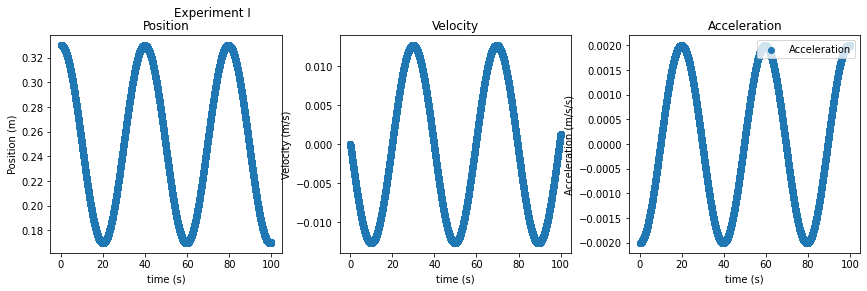

In [63]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Experiment I')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(timeline, x_t[:,0])
ax1.set_title("Position")
ax1.set(xlabel='time (s)', ylabel='Position (m)')

ax2.scatter(timeline, v_t[:,0])
ax2.set_title("Velocity")
ax2.set(xlabel='time (s)', ylabel='Velocity (m/s)')

ax3.scatter(timeline, a_t[:,0], label="Acceleration")
ax3.legend(loc="upper right")
ax3.set_title("Acceleration")
ax3.set(xlabel='time (s)', ylabel='Acceleration (m/s/s)')

fig.show()

#   <font color='Red'> **Experiment II: 2-body** </font>

###  <font color='Red'> To begin lets start with by defining an initial position & velocity, and mass. </font>

In [134]:
Δt = 0.001 ### s(detector)
tf = 100
timeline = np.arange(0, tf, Δt)

R_ix  = np.array([[1., 0., 0.],[2., 0., 0.]])
R_tix = np.zeros( (len(timeline), R_ix.shape[0], R_ix.shape[1] ) )

x_0  = np.array([1., 0., 0.]) ## m
v_0  = np.array([5., 0., 0.]) ## m/s
mass = 5 ## kg 

R_tix.shape

(100000, 2, 3)

In [148]:
k    = 0.1 ### 
m_i  = np.array([2., 4.])
R_ix = np.array([[1., 0., 0.],[2., 0., 0.]])
v_ix = np.zeros((2,3))
x_eq = np.array([0.6, 0., 0.])  ## m

a_ix  = 0
R_tix = np.zeros( (len(timeline), R_ix.shape[0], R_ix.shape[1] ) )
for t in range(len(timeline)):
    R_ix  += v_ix * Δt + 0.5 * a_ix * Δt*Δt
    R_ijx  = R_ix[None, :, :] - R_ix[:, None, :]
    R_ijx += np.array([[np.zeros(3), -x_eq], [x_eq,np.zeros(3)]]) ### !!!! 
    A_ix   = - np.sum( k * R_ijx, axis=0) / m_i[:, None]
    v_ix  += 0.5 * ( a_ix + A_ix ) * Δt
    a_ix   = A_ix

    np.sum(m_i[:,None] * v_ix ** 2)/2 + k * R_ix**2

    R_tix[t] = R_ix

In [125]:
R_ijx

array([[[ 0.        ,  0.        ,  0.        ],
        [ 7.76192536,  0.        ,  0.        ]],

       [[-7.76192536,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]]])

###  <font color='Red'> Define a force as a function of time, with a bump function. Plot the result in time. </font>

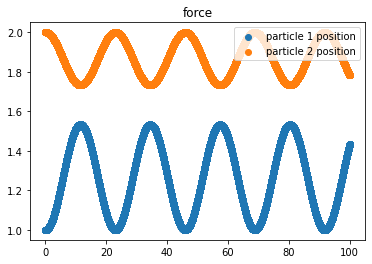

In [147]:
plt.scatter(timeline, R_tix[:, 0, 0], label="particle 1 position")
plt.scatter(timeline, R_tix[:, 1, 0], label="particle 2 position")
plt.legend(loc="upper right")
#plt.xlim([0,10])
plt.title("force")
plt.show()

###  <font color='Red'> Define a for-loop to Velocity-Verlet integrate the motion to obtain a x_t, v_t, and a_t. </font>